НИР ТМО Стельмах Яна ИУ5-64Б 

# Описание набора данных

В качестве набора данных используется датасет [Stroke Prediction Dataset](https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv)
Для решения задачи классификации был выбран набор данных содержащий информацию о пациентах, которые могут быть подвержены инсульту. 

Датасет состоит из одного файла loan_sanction.csv

В наборе данных присутствуют следующие столбцы:
*	id: уникальный идентификатор пациента
*	gender: пол пациента (0 или 1)
*	age: возраст пациента
*	hypertension: страдает ли пациент гипертонией (1 - да, 0 - нет)
*	heart_disease: имеет ли пациент заболевание сердца (1 - да, 0 - нет)
*	ever_married: состоял ли пациент в браке (да или нет)
*	work_type: тип работы пациента в виде цифры от 0 до 4
*	Residence_type: тип места жительства (0 или 1)
*	avg_glucose_level: средний уровень глюкозы в крови пациента
*	bmi: индекс массы тела (Body Mass Index)
*	smoking_status: статус курения пациента (0 – некурящий, 1 - курильщик)
*	stroke: целевая переменная, информация о наличии/отсутствии инсульта у пациента (1 - инсульт есть, 0 - инсульта нет)

Данный датасет использован для решения задачи классификации - предсказания наличия или отсутствия инсульта у пациентов. Целевой признак - stroke

# Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
df = pd.read_csv('/content/stroke_data.csv')

# Разведочный анализ данных, визуализация и предобработка данных

## Общая информация о датасете

In [ ]:
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [ ]:
df.shape

(40910, 11)

In [ ]:
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


## Меняем тип work_type

work_type очевидно содержит категориальные значения, поэтому переведем ее в тип category

In [ ]:
df['work_type'] = df['work_type'].astype('category')


In [ ]:
df.work_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40910 entries, 0 to 40909
Series name: work_type
Non-Null Count  Dtype   
--------------  -----   
40910 non-null  category
dtypes: category(1)
memory usage: 40.3 KB


## Проверка на наличие пропусков

In [ ]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Пропуски в колонке sex. Т.к. их очень мало заполним модой.

In [ ]:
df.sex = df.sex.fillna(df.sex.mode().iloc[0])

In [ ]:
df.sex.isnull().sum()

0

In [ ]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Пропусков больше нет

## Проверка на дубликаты

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

Дубликатов больше нет

## Визуализация

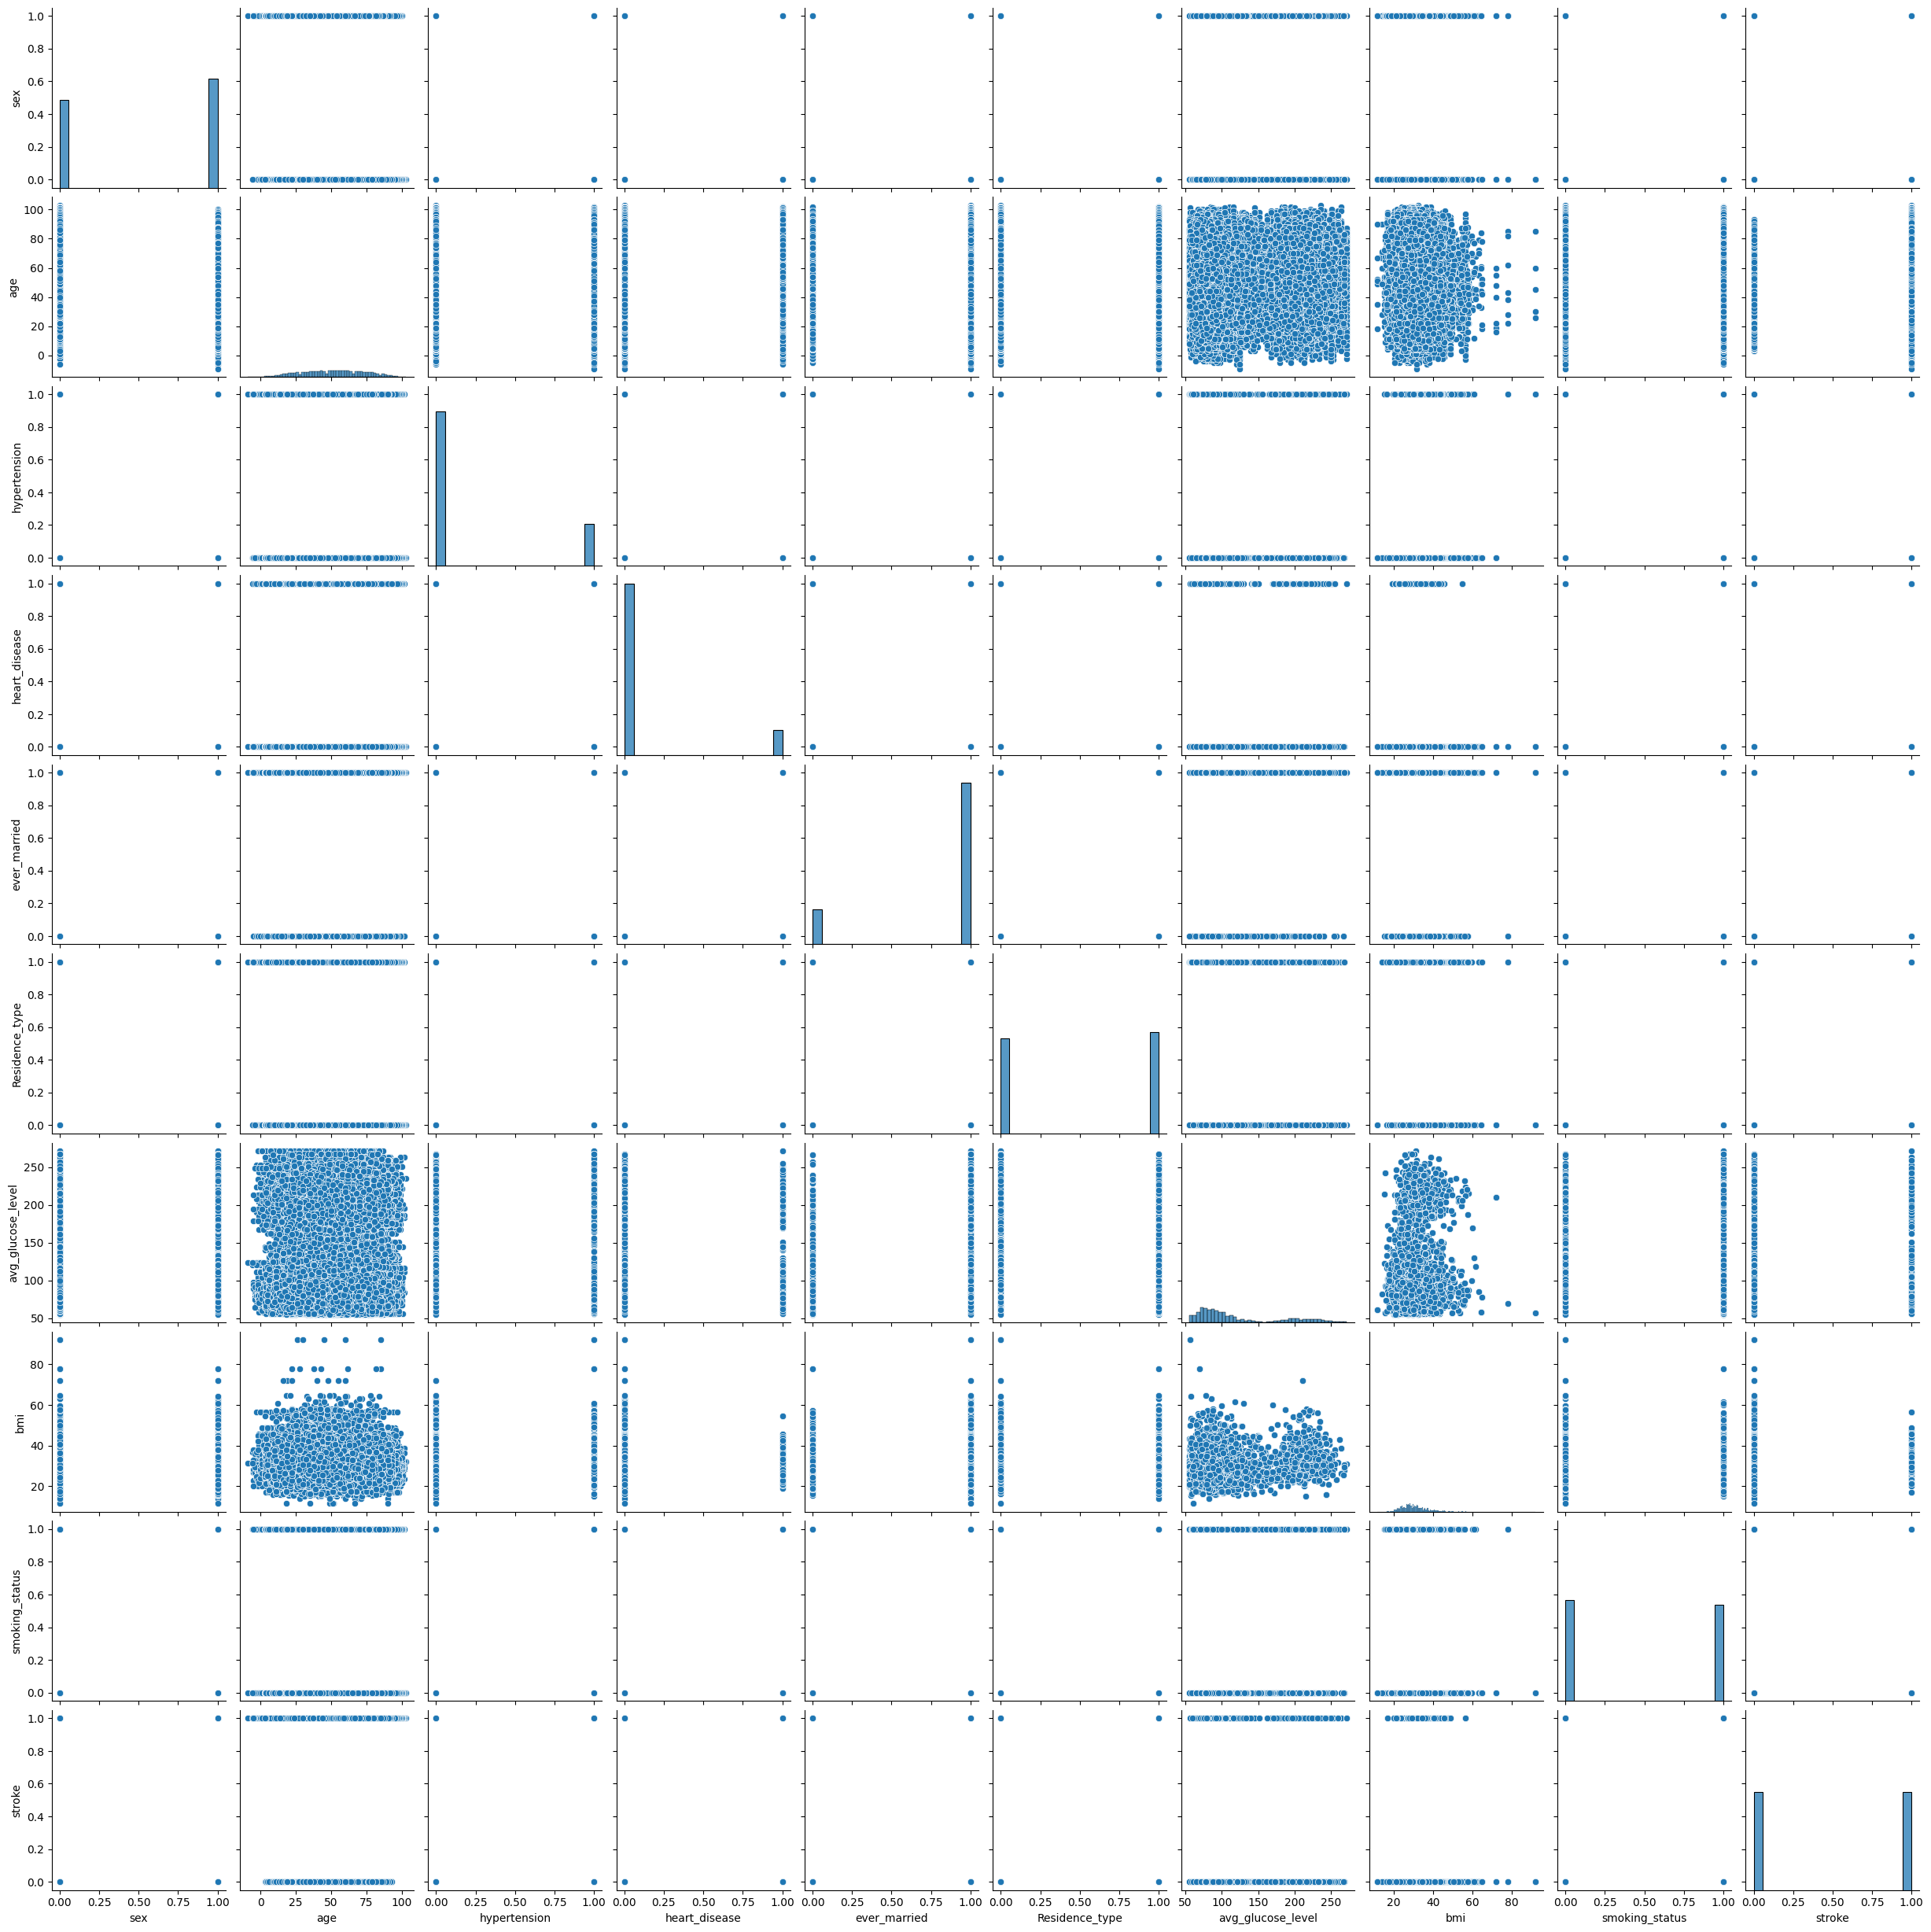

In [ ]:
sns.pairplot(df)

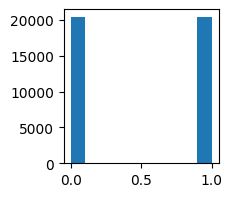

In [ ]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(df['stroke'])
plt.show()

Классы в датасете сбалансированы

In [ ]:
df.groupby(df.stroke).mean()

<ipython-input-19-a70654a059c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.stroke).mean()


,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,
0,0.610397,50.061763,0.108367,0.052961,0.751724,0.509022,106.794326,30.281148,0.454399
1,0.500000,52.592669,0.319257,0.202444,0.890909,0.520723,137.351777,30.531584,0.522776


Предположения на основании поиска среденего значения с группировкой по целевому признаку:
* для инсульта характерно наличие гипертонии и сердечных заболеваний
* среди людей с инсультом немного чаще встречаются замужние или женатые
* среди людей с зафиксированным инсультом средний уровень глюкозы в среднем выше, чем у людей без
* больные инсультом чаще имеют положительный статус курения 

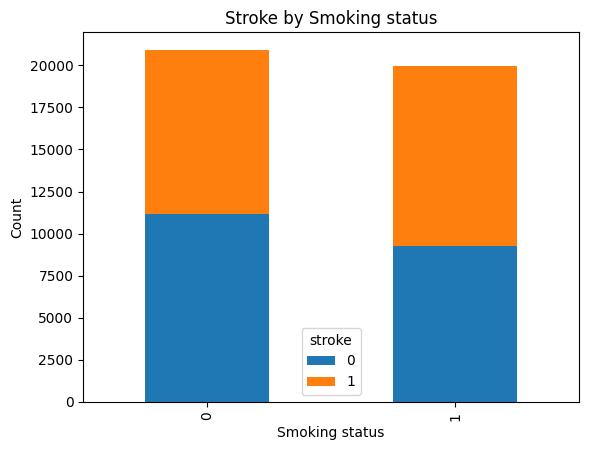

In [ ]:
counts = df.groupby(['smoking_status', 'stroke'])['stroke'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Smoking status')
plt.ylabel('Count')
plt.title('Stroke by Smoking status')

plt.show()

In [ ]:
percentages

stroke,0,1
smoking_status,,
0,53.329191,46.670809
1,46.487893,53.512107


У людей которые ранее курили или курят сейчас процент инсультов несколько больше чем у тех кто никогда не курил

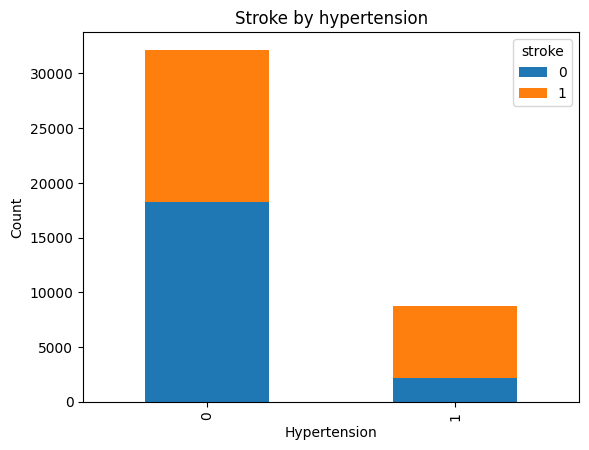

In [ ]:
counts = df.groupby(['hypertension', 'stroke'])['stroke'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Stroke by hypertension')

plt.show()

Подтвердилось предположние, что у большинства больных присутствует гипертония

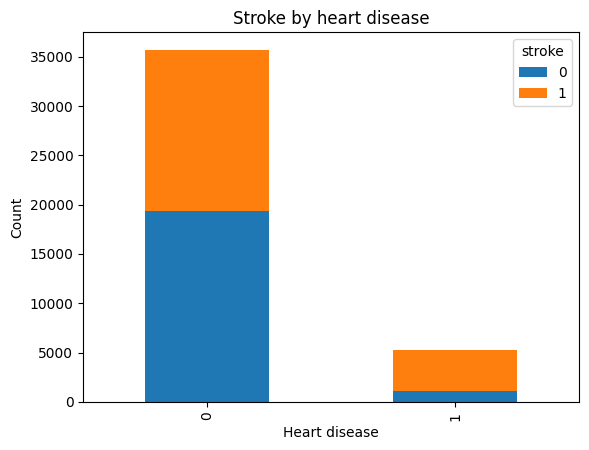

In [ ]:
counts = df.groupby(['heart_disease', 'stroke'])['stroke'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Stroke by heart disease')

plt.show()

 У большинства больных также присутствует заболевание сердца

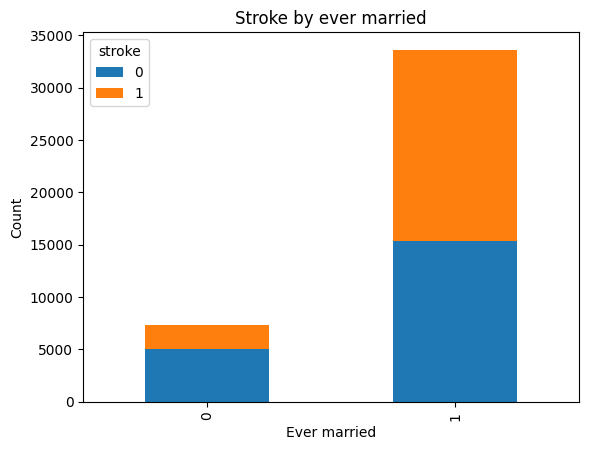

In [ ]:
counts = df.groupby(['ever_married', 'stroke'])['stroke'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Ever married')
plt.ylabel('Count')
plt.title('Stroke by ever married')

plt.show()

Среди больных немного больше людей когда либо бывших в браке

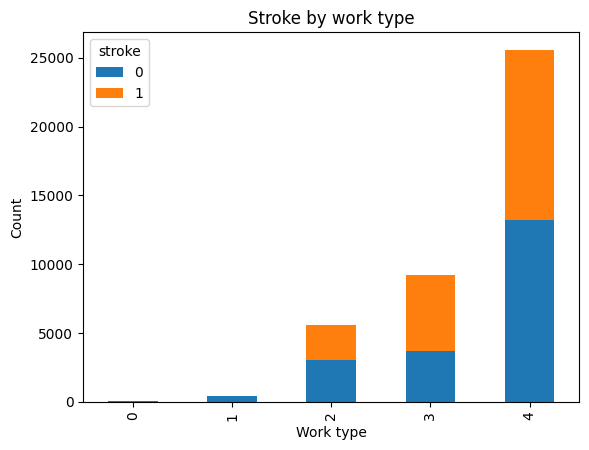

In [ ]:
counts = df.groupby(['work_type', 'stroke'])['stroke'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Work type')
plt.ylabel('Count')
plt.title('Stroke by work type')

plt.show()

In [ ]:
percentages


stroke,0,1
work_type,,
0,100.000000,0.000000
1,100.000000,0.000000
2,55.046528,44.953472
3,39.605890,60.394110
4,51.621104,48.378896


Видим что у людей с типом работы 0 и 1 отсутствуют инсульты, для типа работы 3 инсульт более частое явление чем его отсутствие

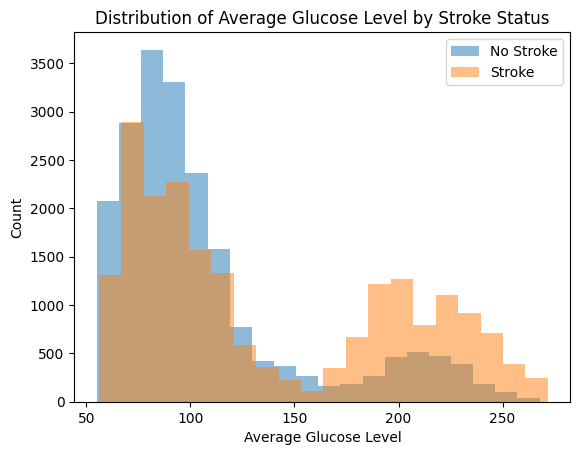

In [ ]:
glucose_stroke = df[df['stroke'] == 1]['avg_glucose_level']
glucose_no_stroke = df[df['stroke'] == 0]['avg_glucose_level']

plt.hist(glucose_no_stroke, bins=20, alpha=0.5, label='No Stroke')
plt.hist(glucose_stroke, bins=20, alpha=0.5, label='Stroke')

plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.title('Distribution of Average Glucose Level by Stroke Status')

plt.legend()

plt.show()

In [ ]:
from scipy.stats import ttest_ind

glucose_stroke = df[df['stroke'] == 1]['avg_glucose_level']
glucose_no_stroke = df[df['stroke'] == 0]['avg_glucose_level']

t_statistic, p_value = ttest_ind(glucose_stroke, glucose_no_stroke)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 55.68303065552766
p-value: 0.0


[P-значение называется вероятностью того, что результаты выборки данных произошли случайно](https://pythonpip.ru/osnovy/t-test-na-python)

Делаем вывод, что среднее значение глюкозы влияет на наличие инсульта

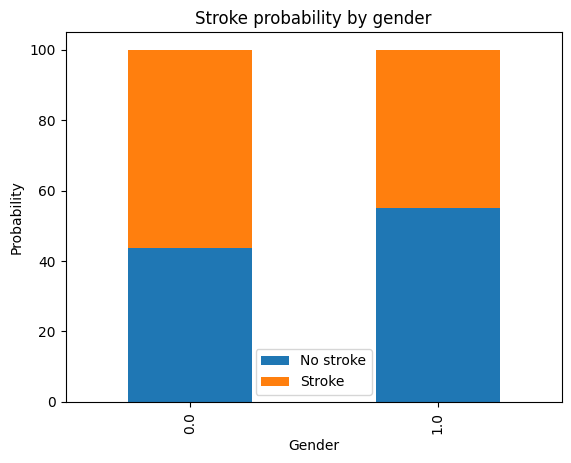

In [ ]:
counts = df.groupby(['sex', 'stroke'])['stroke'].count().unstack()
probabilities = counts.divide(counts.sum(axis=1), axis=0) * 100

ax = probabilities.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Probability')
plt.title('Stroke probability by gender')

handles, labels = ax.get_legend_handles_labels()
labels = ['No stroke', 'Stroke']
ax.legend(handles, labels)

plt.show()

In [ ]:
probabilities

stroke,0,1
sex,,
0.0,43.781942,56.218058
1.0,54.957732,45.042268


Есть небольшие различия в соотношении полов больных и здоровых

Построим violin plot для каждого численного признака

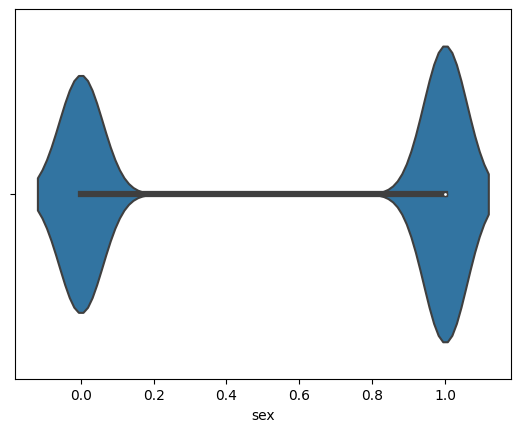

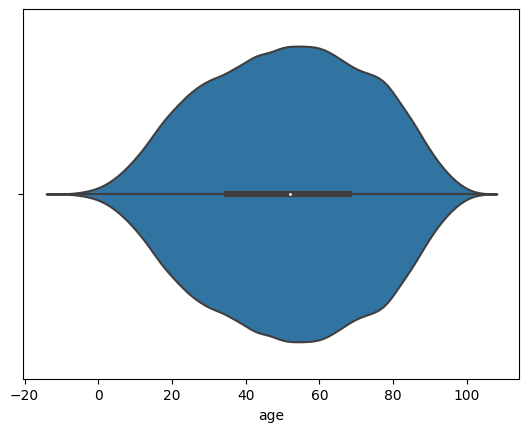

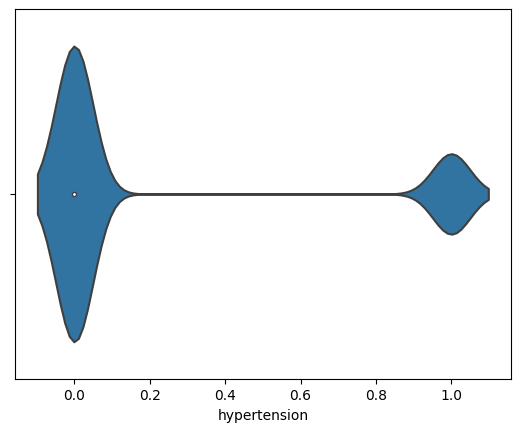

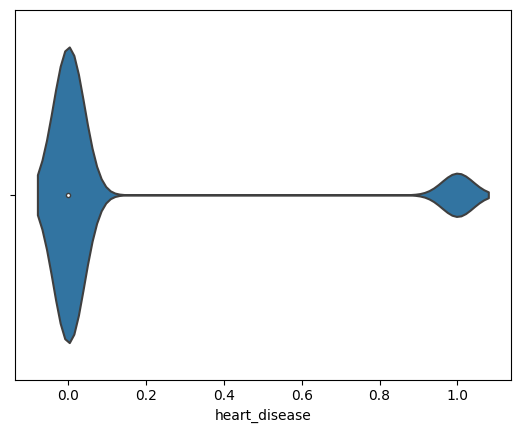

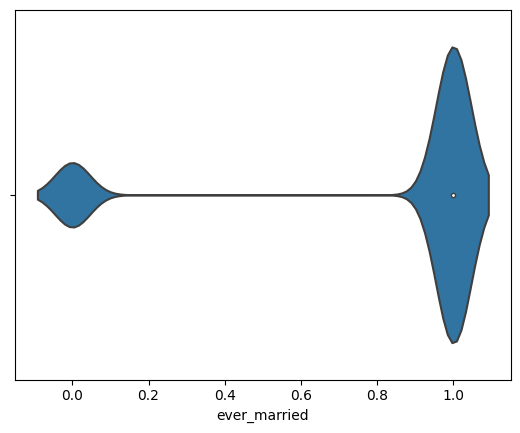

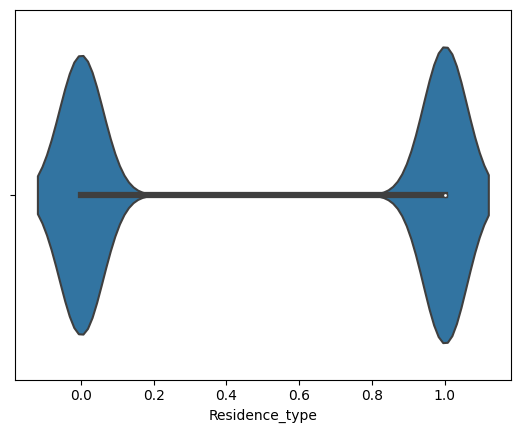

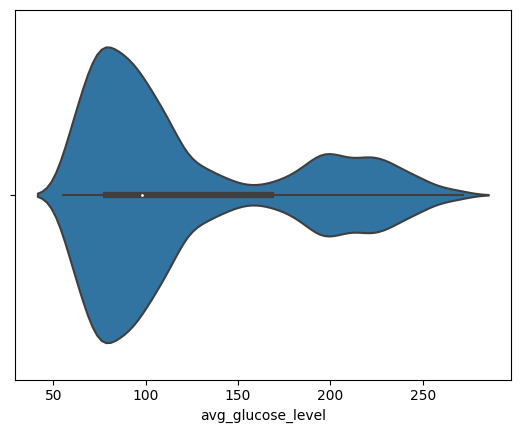

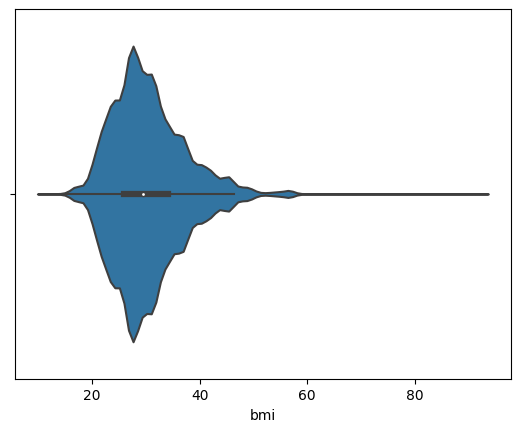

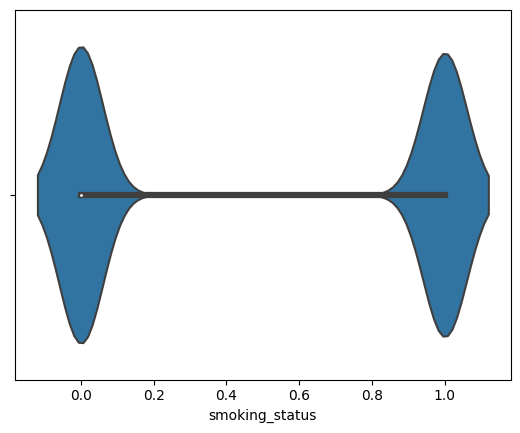

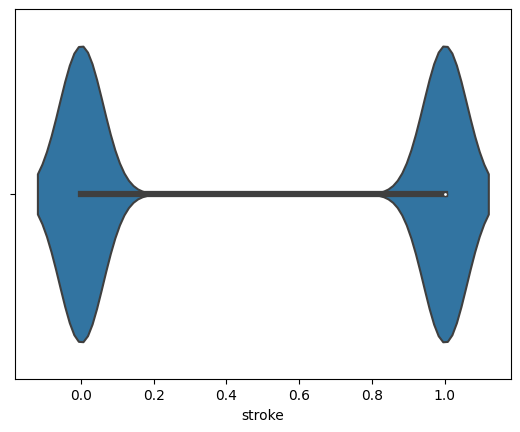

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    sns.violinplot(x=df[col])
    plt.show()

# Кодирование категориальных признаков, масштабирование данных.

In [ ]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40909 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                40909 non-null  float64 
 1   age                40909 non-null  float64 
 2   hypertension       40909 non-null  int64   
 3   heart_disease      40909 non-null  int64   
 4   ever_married       40909 non-null  int64   
 5   work_type          40909 non-null  category
 6   Residence_type     40909 non-null  int64   
 7   avg_glucose_level  40909 non-null  float64 
 8   bmi                40909 non-null  float64 
 9   smoking_status     40909 non-null  int64   
 10  stroke             40909 non-null  int64   
dtypes: category(1), float64(4), int64(6)
memory usage: 3.5 MB


## Масштабирование

Посмотрим на распредление колонок, которые будем масштабировать

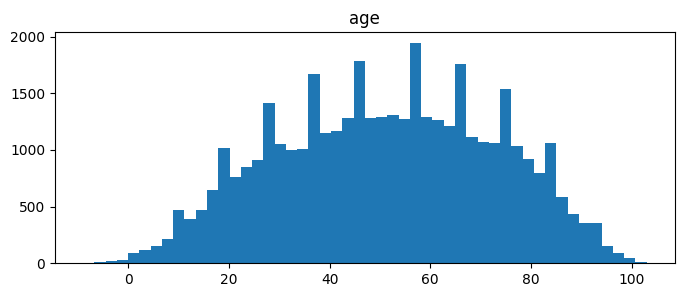

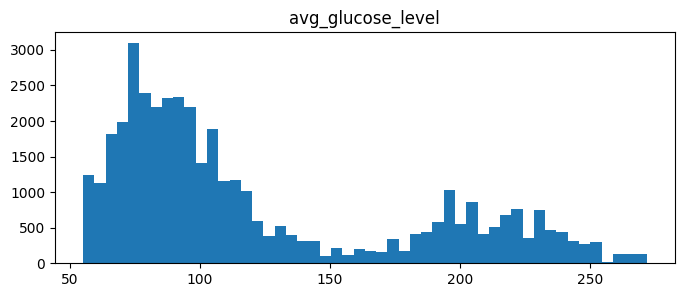

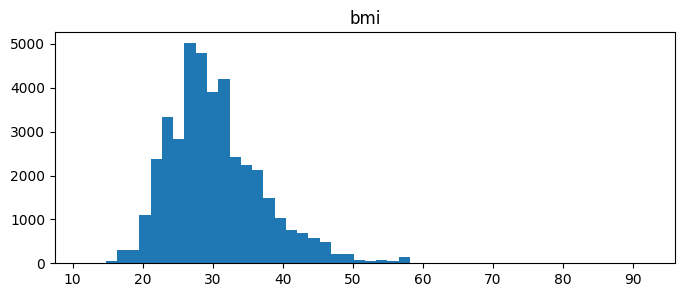

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(df[col], 50)
    ax.title.set_text(col)
    plt.show()

Масштабируем с помощью StandardScaler, который преобразует каждый признак таким образом, чтобы он имел среднее значение равное 0 и стандартное отклонение равное 1.

In [ ]:
scaler = StandardScaler()

df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


In [ ]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,4.090900e+04,4.090900e+04,4.090900e+04
mean,6.113839e-17,3.223661e-16,2.598382e-16
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.789858e+00,-1.163239e+00,-2.766089e+00
25%,-7.550705e-01,-7.527177e-01,-6.593059e-01
50%,3.109727e-02,-4.196795e-01,-1.472406e-01
75%,7.710199e-01,7.906893e-01,5.403898e-01
max,2.389601e+00,2.600075e+00,9.011412e+00


Убедимся что распределение не изменилось

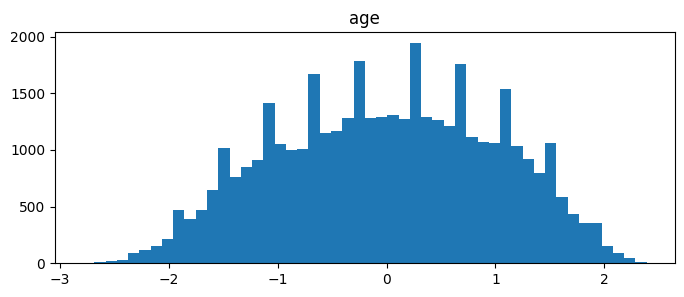

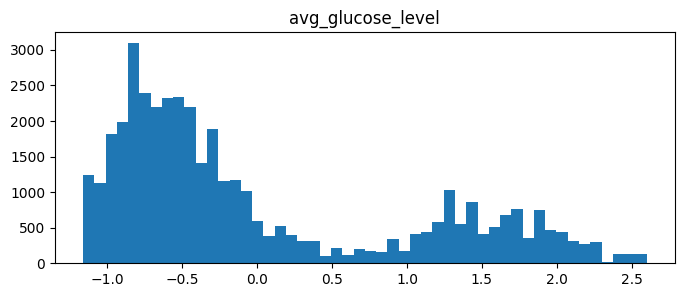

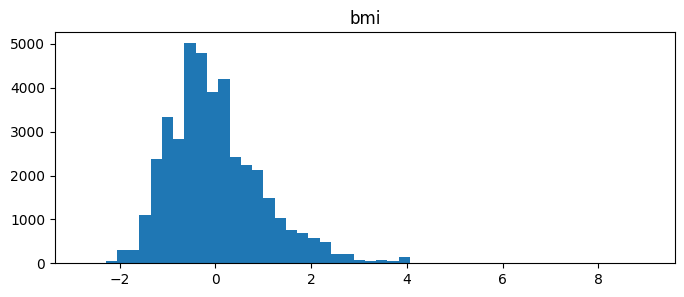

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(df[col], 50)
    ax.title.set_text(col)
    plt.show()

## Кодирование категориальных признаков

In [ ]:
category_columns = df.select_dtypes(include=['category']).columns
category_columns

Index(['work_type'], dtype='object')

Будем использовать метод OneHotEncoding, чтобы не создавать несуществующие зависимости

In [ ]:
ohe = OneHotEncoder()
encoded_columns = ohe.fit_transform(df[category_columns])
column_names = ohe.get_feature_names_out(category_columns)


In [ ]:
len(encoded_columns.toarray())

40909

In [ ]:
print(encoded_columns)

  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 4)	1.0
  (7, 4)	1.0
  (8, 2)	1.0
  (9, 4)	1.0
  (10, 4)	1.0
  (11, 3)	1.0
  (12, 4)	1.0
  (13, 4)	1.0
  (14, 4)	1.0
  (15, 2)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 4)	1.0
  (19, 3)	1.0
  (20, 4)	1.0
  (21, 3)	1.0
  (22, 4)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (40884, 4)	1.0
  (40885, 4)	1.0
  (40886, 3)	1.0
  (40887, 4)	1.0
  (40888, 3)	1.0
  (40889, 4)	1.0
  (40890, 4)	1.0
  (40891, 4)	1.0
  (40892, 4)	1.0
  (40893, 4)	1.0
  (40894, 3)	1.0
  (40895, 2)	1.0
  (40896, 1)	1.0
  (40897, 4)	1.0
  (40898, 4)	1.0
  (40899, 3)	1.0
  (40900, 2)	1.0
  (40901, 3)	1.0
  (40902, 3)	1.0
  (40903, 4)	1.0
  (40904, 4)	1.0
  (40905, 4)	1.0
  (40906, 2)	1.0
  (40907, 3)	1.0
  (40908, 4)	1.0


In [ ]:
df.shape

(40909, 11)

In [ ]:
df[ohe.categories_[0]] = encoded_columns.toarray()

In [ ]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1,2,3,4
0,1.0,0.539794,0,1,1,4,1,1.852172,0.906151,1,1,0.0,0.0,0.0,0.0,1.0
1,1.0,-0.431354,0,1,1,4,0,-0.280696,0.306303,0,1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.447304,0,0,1,4,1,0.853927,0.584281,1,1,0.0,0.0,0.0,0.0,1.0
3,1.0,-0.477600,1,0,1,3,0,0.904134,-0.937284,0,1,0.0,0.0,0.0,1.0,0.0
4,1.0,1.557188,0,0,1,4,1,1.114172,-0.205762,1,1,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
0                    0
1                    0
2                    0
3                    0
4                    0
dtype: int64

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<ipython-input-46-ab43f46e6b23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


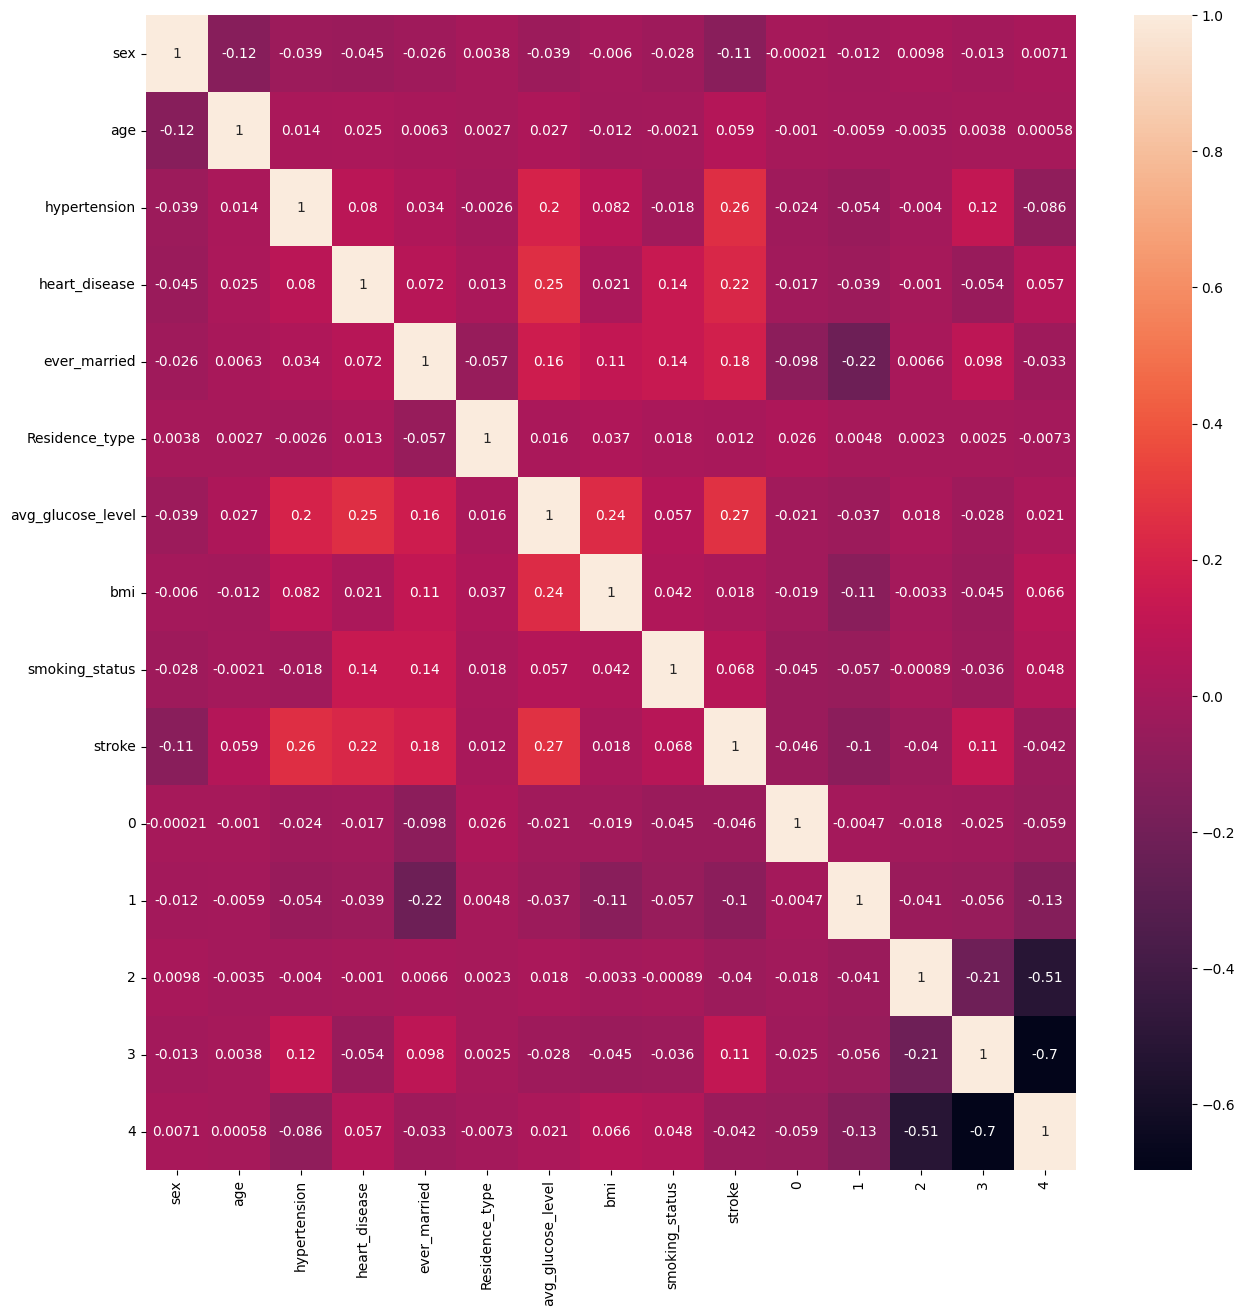

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15), dpi=100)
sns.heatmap(corr_matrix, annot=True)
plt.show()


Выводы:
* целевой признак stroke больше всего коррелирует с наличием гипертонии (0.26), наличием сердечного заболевания (0.22), средним уровнем глюкозы (0.22).
* столбцы с типом работы оставим для построения модели, т.к. ранее построена диаграмма подтверждающая что тип работы имеет взаимосвязь с появлением инсульта
* столбцы со статусом курения также оставим, т.к. ранее выявили что зависмость между курением и инсультом может существовать
* столбцы ИМТ и тип проживания не имеют корреляции с целевым признаком

# Выбор метрик для последующей оценки качества моделей

Выбираем метрики которые учитывают TP:
* $Precision = \frac{TP}{TP + FP}$ - показывает, какую долю объектов, которые модель предсказала как положительные, действительно являются положительными.
* $Recall  \frac{TP}{TP + FN}$ - показывает, какую долю положительных объектов модель способна обнаружить.
* $F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ - среднее гармоническое precision и recall
* $ROC AUC$

# Выбор моделей для решения задачи классификации

Используем следующие модели
* KNN
* SVC
* Дерево решений
* Случайный лес
* Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных


In [ ]:
X = df.drop(columns=['stroke', 'bmi', 'Residence_type'])
y = df.stroke
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,0,1,2,3,4
0,1.0,0.539794,0,1,1,4,1.852172,1,0.0,0.0,0.0,0.0,1.0
1,1.0,-0.431354,0,1,1,4,-0.280696,0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.447304,0,0,1,4,0.853927,1,0.0,0.0,0.0,0.0,1.0
3,1.0,-0.477600,1,0,1,3,0.904134,0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.557188,0,0,1,4,1.114172,1,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.shape

(40909, 13)

In [ ]:
y.shape

(40909,)

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [ ]:
from sklearn.metrics import roc_auc_score

def evaluate_models(X_train, X_test, y_train, y_test, models):
    
    metrics = ['Precision', 'Recall', 'F1-score']

    for model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'{model.__class__.__name__}:')
        for i, metric in enumerate(metrics):
            print(f'{metric}: {round([precision, recall, f1][i], 2)}')
    

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
  
        print("ROC AUC score:", roc_auc_score(y_test, y_proba))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model.__class__.__name__}: ROC curve')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
models = [KNeighborsClassifier(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
    

KNeighborsClassifier:
Precision: 0.75
Recall: 0.82
F1-score: 0.79
ROC AUC score: 0.8531544653444516


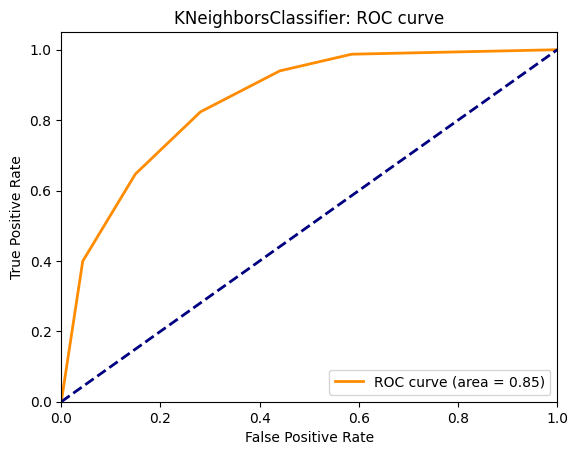

SVC:
Precision: 0.73
Recall: 0.69
F1-score: 0.71
ROC AUC score: 0.783156730530161


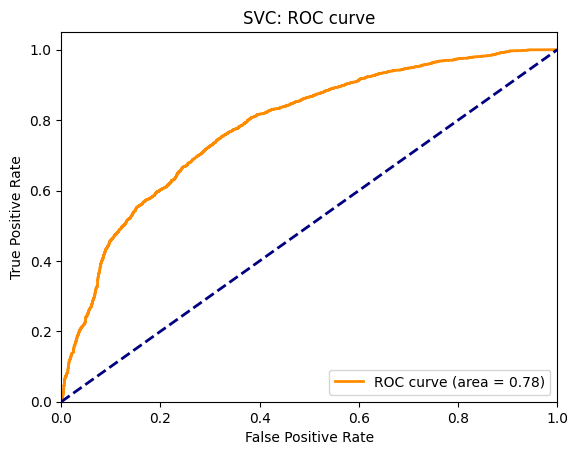

DecisionTreeClassifier:
Precision: 0.99
Recall: 1.0
F1-score: 1.0
ROC AUC score: 0.9959451681616494


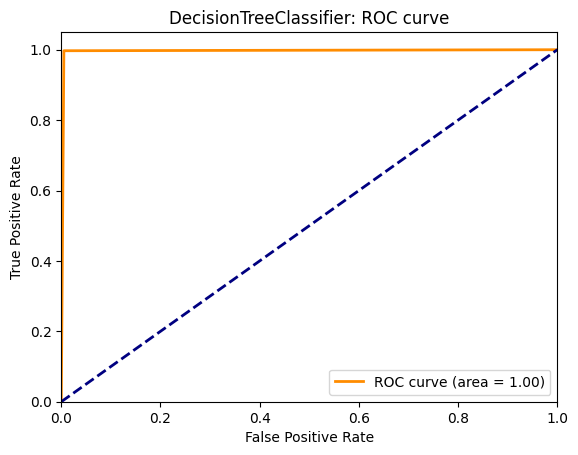

RandomForestClassifier:
Precision: 0.94
Recall: 0.99
F1-score: 0.96
ROC AUC score: 0.9934043948188809


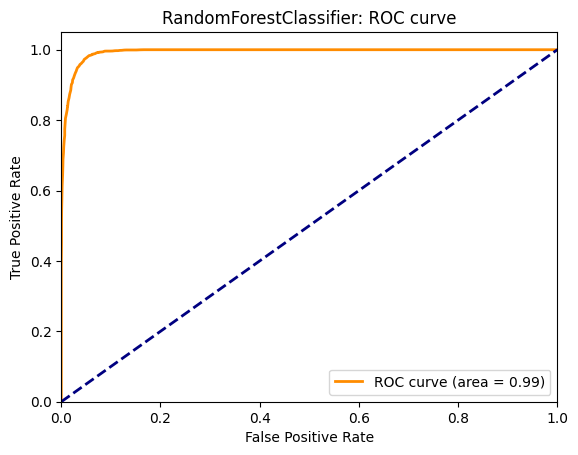

GradientBoostingClassifier:
Precision: 0.82
Recall: 0.76
F1-score: 0.78
ROC AUC score: 0.873846697729794


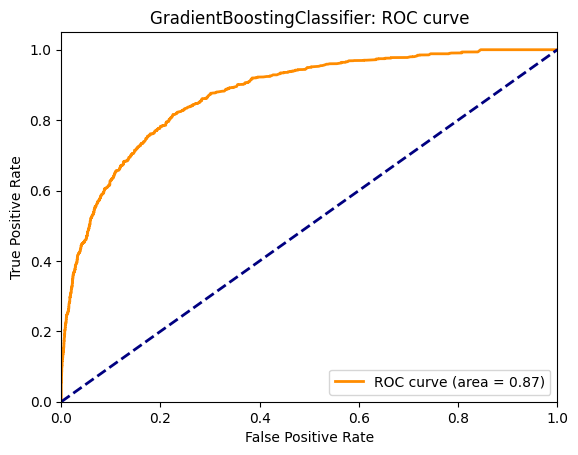

In [ ]:
evaluate_models(X_train, X_test, y_train, y_test, models)

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [9, 10, 11, 12],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.7517667908868213


In [ ]:
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model

KNeighborsClassifier(algorithm='brute', n_neighbors=10)

In [ ]:
svc_model = SVC()
param_grid = {'C': [1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [4, 5],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 10, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
Best score: 0.7393589189696377


In [ ]:
best_svc_model = SVC(**grid_search.best_params_, probability=True)
best_svc_model

SVC(C=10, degree=5, gamma='auto', kernel='poly', probability=True)

In [ ]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9956610431857102


In [ ]:
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)
best_tree_model

DecisionTreeClassifier(criterion='entropy')

In [ ]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9958138175693575


In [ ]:
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model

RandomForestClassifier(max_features=None, min_samples_split=5, n_estimators=200)

In [ ]:
gb_model = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9970666310020382


In [ ]:
best_gb_model = GradientBoostingClassifier(**grid_search.best_params_)
best_gb_model


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=2)

In [ ]:
opt_models = [ best_knn_model, best_svc_model, best_tree_model, best_rf_model, best_gb_model]

KNeighborsClassifier:
Precision: 0.77
Recall: 0.77
F1-score: 0.77
ROC AUC score: 0.8481729394579811


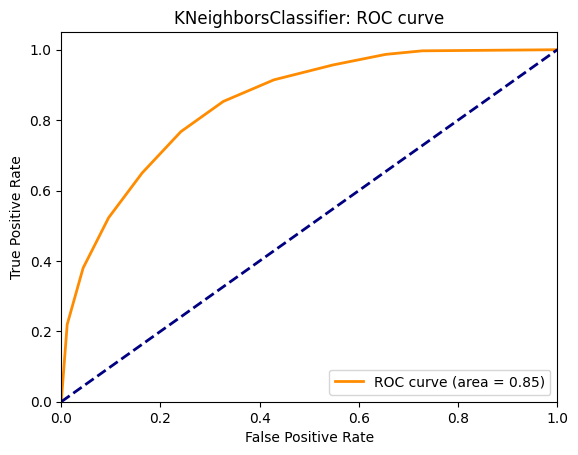

SVC:
Precision: 0.77
Recall: 0.71
F1-score: 0.74
ROC AUC score: 0.8192640298072141


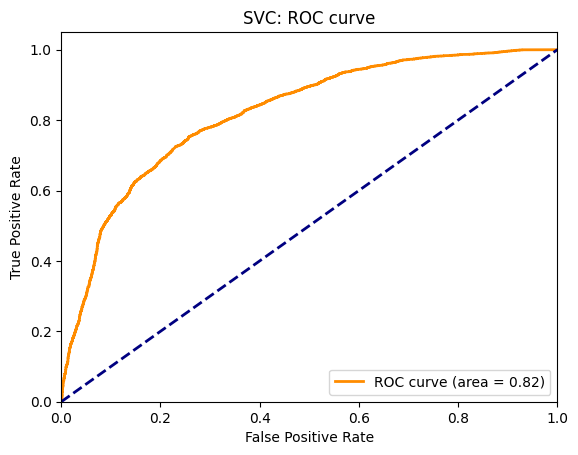

DecisionTreeClassifier:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 0.9964343646004666


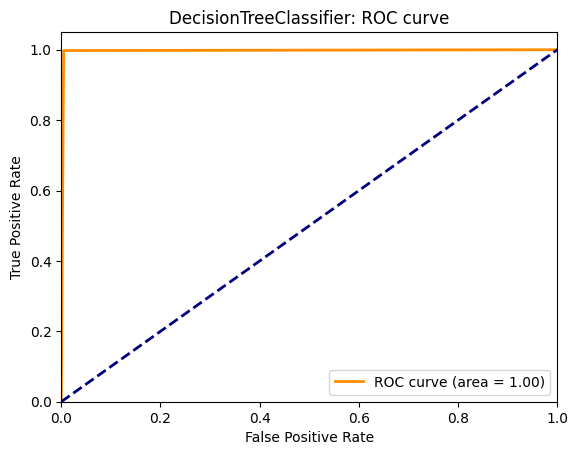

RandomForestClassifier:
Precision: 0.99
Recall: 1.0
F1-score: 1.0
ROC AUC score: 0.9999292951268026


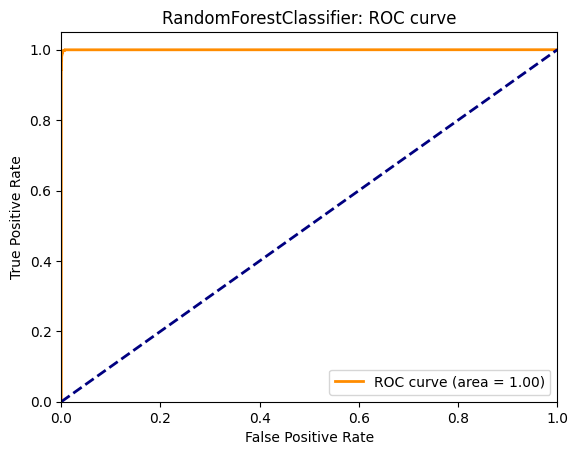

GradientBoostingClassifier:
Precision: 0.99
Recall: 1.0
F1-score: 1.0
ROC AUC score: 0.9999631234938607


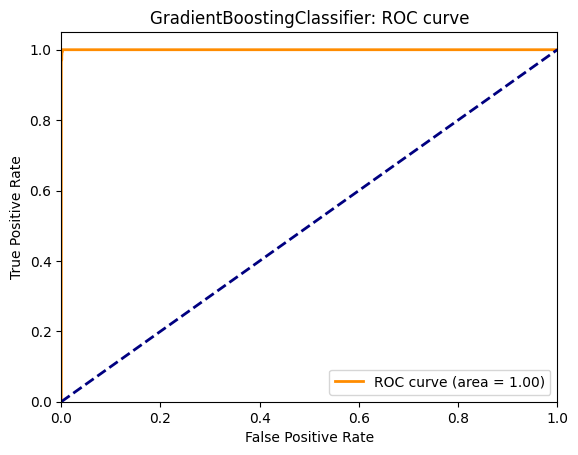

In [ ]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models)

На основании трех метрик из четырех лучшими для решения данной задачи классификации оказались модели градиентного бустинга и дерева решений.